# DRAFT VERSION. 

### It is based on my local folders. I will refactor whole code asap. :)

I am trying to reproduce [pyannote.audio](https://github.com/pyannote/pyannote-audio) tutorials.

In [ ]:
# Clone the repository to access .yml files.

!git clone https://github.com/pyannote/pyannote-audio.git

In [1]:
import numpy as np

In [2]:
!python --version

Python 3.6.5 :: Anaconda custom (64-bit)


In [3]:
from pyannote.database import *

In [ ]:
# Read the config.yml file to reproduce exact result. 

# !cat ./pyannote-audio/tutorials/change-detection/config.yml

In this notebook, I will use AMI Corpus.

In [ ]:
# To get shell script to download AMI Corpus. Also, you can create new script from
# http://groups.inf.ed.ac.uk/ami/download/ Please select all meetings and headset
# mix for this example.


!wget http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-9938-Thu-Jul-19-2018.wget.sh

In [ ]:
# Give permission to AMI Corpus script

!chmod +x amiBuild-9938-Thu-Jul-19-2018.wget.sh

In [ ]:
# Run the shell script to download datas.

! ./amiBuild-9938-Thu-Jul-19-2018.wget.sh

In [ ]:
# Create new folder to create db.yml inside of that folder.

!mkdir .pyannote

In [5]:
! cat ./.pyannote/db.yml | grep AMI


AMI: ../pyannote-audio/amicorpus/*/audio/{uri}.wav


I am trying to create db.yml via cat command, however, with Google Colab, I can not do that. So that, I just download this file from my Google Drive. To create, you own db.yml, you can use any text editor. We should write the directory of AMI Corpus. In this case, it is  **AMI: ../pyannote-audio/amicorpus/*/audio/{uri}.wav**


In [6]:
!cat ./.pyannote/db.yml | grep AMI 

AMI: ../pyannote-audio/amicorpus/*/audio/{uri}.wav


In [ ]:
!ls

In [2]:
cd pyannote-audio

/home/herdogan/Desktop/SpChangeDetect/pyannote-audio


Now, time for the tutorials. In this notebook, I will provide codes for training and validation. For further information, please check the [repository.](github.com/pyannote/pyannote-audio/tree/master/tutorials)

## **Feature Extraction**

In [88]:
!cat tutorials/feature-extraction/config.yml

# The MIT License (MIT)
#
# Copyright (c) 2018 CNRS
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWIS

In [100]:
!pyannote-speech-feature tutorials/feature-extraction AMI.SpeakerDiarization.MixHeadset

Development set: 21it [01:12,  3.46s/it]
Test set: 22it [01:30,  4.13s/it]
Training set: 115it [08:02,  4.20s/it]


In [113]:
!ls tutorials/feature-extraction/AMI | head -n 5

EN2001a.Mix-Headset.npy
EN2001a.Mix-Headset.npy.npy
EN2001b.Mix-Headset.npy
EN2001b.Mix-Headset.npy.npy
EN2001d.Mix-Headset.npy
ls: write error: Broken pipe


In [115]:
import os
import glob
all_npy_paths = glob.glob(os.path.join("tutorials/feature-extraction/AMI/", '*npy'))


for single_file in all_npy_paths:
    single_arr = np.load(single_file)
    single_arr = 0.2*single_arr
    filename = single_file.split("/")[-1]
    np.save("./tutorials/feature-extraction/AMI/" + filename, single_arr)

In [3]:
import numpy as np
en2001a_mfcc_arr = np.load("tutorials/feature-extraction/AMI/EN2001a.Mix-Headset.npy")

In [4]:
print (en2001a_mfcc_arr)
print (en2001a_mfcc_arr.shape)
print (en2001a_mfcc_arr.max())
print (en2001a_mfcc_arr.mean())
print (en2001a_mfcc_arr.min())
# en2201a -> 5223 seconds

[[ -6.33431027e-02  -1.49586792e-01  -1.98655682e-01 ...,  -5.40896823e-02
   -2.84721738e-01  -2.47992584e-01]
 [ -1.59276145e-01  -1.02097479e-01  -6.92206136e-02 ...,  -8.14036917e-02
   -1.93304863e-01  -5.38559133e-02]
 [ -1.42969548e-01  -1.09740634e-01   6.15382444e-02 ...,  -1.75004642e-01
   -2.37291371e-01   1.40276377e-01]
 ..., 
 [  6.59172672e-02  -7.40870963e-02   2.26898152e-01 ...,  -1.85630753e-01
   -1.71043870e-01   6.33433839e-03]
 [  1.27891502e-01   4.69031434e-02   4.31307062e-02 ...,   2.60584741e-02
   -2.15299210e-01   1.86767621e-01]
 [  4.64118326e-01   2.11164620e-01  -2.56325406e-04 ...,   1.53765297e-01
   -1.10131041e-01   1.85273461e-01]]
(525025, 59)
1.72550486905
-1.18591913861e-05
-1.69538249579


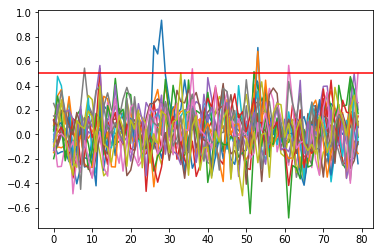

In [6]:
import matplotlib.pyplot as pp
%matplotlib inline

pp.plot(en2001a_mfcc_arr[:80,:19])
pp.axhline(y=0.5, color='r', linestyle='-')
pp.show()

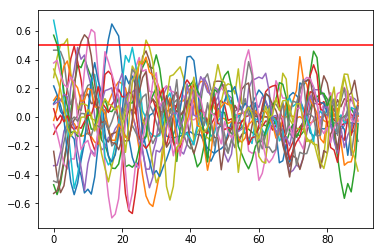

In [119]:
pp.plot(en2001a_mfcc_arr[25000:25090,19:38])
pp.axhline(y=0.5, color='r', linestyle='-')
pp.show()

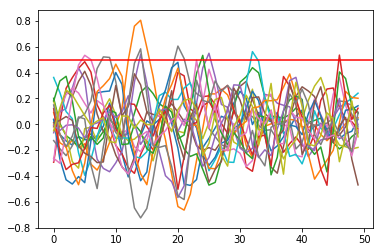

In [120]:
pp.plot(en2001a_mfcc_arr[25000:25050,38:57])
pp.axhline(y=0.5, color='r', linestyle='-')
pp.show()

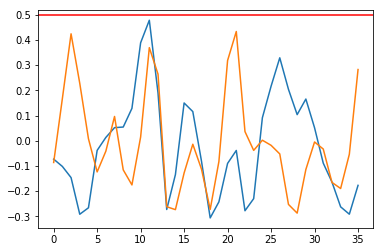

In [121]:
pp.plot(en2001a_mfcc_arr[30000:30036,57:])
pp.axhline(y=0.5, color='r', linestyle='-')
pp.show()

In [87]:
en2001a_mfcc_arr_sw = np.swapaxes(en2001a_mfcc_arr,0,1)

for single_arr in en2001a_mfcc_arr_sw:
    print ("Max:", single_arr.max())
    print ("Mean:", single_arr.mean())
    print ("Min:", single_arr.min())

Max: 4.67206868511
Mean: -0.00327771748712
Min: -7.74807435455
Max: 4.57660569986
Mean: -0.000983523035327
Min: -7.33326009641
Max: 5.39570936237
Mean: -0.00330197004225
Min: -4.185999869
Max: 4.99002169622
Mean: -0.000856544053056
Min: -5.58428046028
Max: 4.82868298607
Mean: -0.000221723936373
Min: -5.23961234547
Max: 5.21797588506
Mean: 0.00164615713298
Min: -5.02888891841
Max: 4.57997270817
Mean: 0.00072336035893
Min: -5.08302256156
Max: 4.94139822765
Mean: 0.000149291938704
Min: -5.24390618137
Max: 4.50409551512
Mean: 0.00117772806903
Min: -5.43074925107
Max: 5.76988764399
Mean: -0.000295187150134
Min: -4.85479746705
Max: 6.21332888256
Mean: 0.000260009543833
Min: -5.40605210013
Max: 4.98522373772
Mean: 5.34732303719e-05
Min: -5.63080686578
Max: 5.56045420215
Mean: -0.000400448257818
Min: -5.03981662682
Max: 5.57365160497
Mean: 0.000150022119548
Min: -5.19976914671
Max: 5.20332094895
Mean: -0.000180634145956
Min: -5.15845756689
Max: 5.87784753345
Mean: 0.000452236675687
Min: -5.598

In [108]:
en2001a_mfcc_arr.max()

8.6275243452728443

In [57]:
tanh_en2001_mfcc_arr = np.tanh(en2001a_mfcc_arr)

In [65]:
tanh_en2001_mfcc_arr_sw = np.swapaxes(tanh_en2001_mfcc_arr,0,1)

for single_arr in tanh_en2001_mfcc_arr_sw:
    print ("Max:", single_arr.max())
    print ("Mean:", single_arr.mean())
    print ("Min:", single_arr.min())

Max: 0.999825061778
Mean: 0.00755754453334
Min: -0.99999962749
Max: 0.999788263947
Mean: -0.00352723235392
Min: -0.999999146033
Max: 0.999958850226
Mean: -0.0423467192404
Min: -0.999537601638
Max: 0.999907374171
Mean: 0.00851043960285
Min: -0.999971778539
Max: 0.999872102672
Mean: -0.000648728535128
Min: -0.999943772558
Max: 0.999941286093
Mean: 0.0193001608872
Min: -0.999914301352
Max: 0.999789684842
Mean: 0.00934270215048
Min: -0.999923094749
Max: 0.999897914547
Mean: 0.00452242710509
Min: -0.99994425334
Max: 0.999755223803
Mean: 0.0151110146661
Min: -0.999961635212
Max: 0.999980530041
Mean: -0.00776772069208
Min: -0.999878610776
Max: 0.999991979539
Mean: 0.00461661334567
Min: -0.999959692668
Max: 0.999906481105
Mean: 0.000801441844489
Min: -0.999974286114
Max: 0.999970401179
Mean: -0.00550466808213
Min: -0.999916153935
Max: 0.999971172202
Mean: 0.0011941654108
Min: -0.99993910878
Max: 0.999939539781
Mean: -0.0018075236984
Min: -0.999933864244
Max: 0.999984311078
Mean: 0.002584644882

In [62]:
tanh_en2001_mfcc_arr.min()

-0.9999999132883699

In the paper, they use 13 coefficients for mfcc and mfcc´s derivatives. However, in code, they use 19 coefficients for these features.

## *Speech activity detection*

In [ ]:
cat tutorials/speech-activity-detection/config.yml

If you want to use tensorboard, you can check [this](https://stackoverflow.com/questions/47818822/can-i-use-tensorboard-with-google-colab)

In [ ]:
# Training.

!pyannote-speech-detection train --to=5 tutorials/speech-activity-detection AMI.SpeakerDiarization.MixHeadset

In [ ]:
# Validation.

!pyannote-speech-detection validate tutorials/speech-activity-detection/train/AMI.SpeakerDiarization.MixHeadset.train AMI.SpeakerDiarization.MixHeadset

## *Speaker Change Detection*

In [ ]:
cat tutorials/change-detection/config.yml

In [1]:
# !pyannote-speech-detection -h 

In [7]:
# Training.

!pyannote-change-detection train --to=5  tutorials/change-detection AMI.SpeakerDiarization.MixHeadset 

Training set: 115it [00:01, 87.95it/s]
Training set: 115it [00:36,  3.17it/s]
Auto LR: 100%|█████████| 500/500 [06:57<00:00,  1.29it/s, loss=1.52e+03, lr=959]/home/herdogan/anaconda3/envs/pyannote/lib/python3.6/site-packages/pyannote/audio/train/trainer.py:179: RuntimeWarning: invalid value encountered in greater
  decreasing = 1 * (probability > 0.999)

Iteration #0: 100%|█| 352/352 [04:48<00:00,  1.29batch/s, loss=0.382, lr=0.000681]

Iteration #1:   0%|           | 0/352 [00:00<?, ?batch/s, loss=..., lr=Ellipsis]

Iteration #1:   0%|         | 0/352 [00:00<?, ?batch/s, loss=0.323, lr=0.000681]

Iteration #1:   0%| | 1/352 [00:00<04:40,  1.25batch/s, loss=0.323, lr=0.000681]

Iteration #1:   0%| | 1/352 [00:01<04:40,  1.25batch/s, loss=0.309, lr=0.000682]

Iteration #1:   1%| | 2/352 [00:01<04:37,  1.26batch/s, loss=0.309, lr=0.000682]

Iteration #1:   1%| | 2/352 [00:02<04:37,  1.26batch/s, loss=0.314, lr=0.000683]

Iteration #1:   1%| | 3/352 [00:02<04:35,  1.27batch/s, loss=0.314,

In [ ]:
# Validation
!pyannote-change-detection validate --purity=0.8 --to=5 tutorials/change-detection/train/AMI.SpeakerDiarization.MixHeadset.train AMI.SpeakerDiarization.MixHeadset

In [ ]:
cd ..

In [8]:
!ls

CHANGELOG.md  MANIFEST.in  README.md  setup.cfg  tutorials
LICENSE       pyannote	   scripts    setup.py	 versioneer.py


In [9]:
mkdir raw_scores

In [6]:
cd pyannote-audio/

/home/herdogan/Desktop/SpChangeDetect/pyannote-audio


In [11]:
!pyannote-change-detection apply tutorials/change-detection/train/AMI.SpeakerDiarization.MixHeadset.train/weights/0005.pt   AMI.SpeakerDiarization.MixHeadset raw_scores

Development set: 21it [06:10, 17.67s/it]
Test set: 22it [07:04, 19.30s/it]
Training set: 115it [38:18, 19.99s/it]


In [4]:
#AMI Protocol
from pyannote.database import get_protocol
protocol = get_protocol('AMI.SpeakerDiarization.MixHeadset')

In [7]:
# Precomputed Scores
from pyannote.audio.features import Precomputed
precomputed = Precomputed('raw_scores')

In [8]:
precomputed

In [9]:
precomputed.shape

<bound method Precomputed.shape of <pyannote.audio.features.utils.Precomputed object at 0x7fbe58d935c0>>

In [10]:
# Peak Detection
from pyannote.audio.signal import Peak
peak = Peak(alpha=0.5, min_duration=1.0, log_scale=True)

In [11]:
en2001a_out = np.load("./raw_scores/AMI/EN2001a.Mix-Headset.npy")

In [12]:
en2001a_out.shape
# Why it is 2 dimensional?

(525025, 2)

In [13]:
print (en2001a_out)
print (en2001a_out.max())
print (en2001a_out.mean())

[[-0.10468286 -2.30870461]
 [-0.10341078 -2.32030582]
 [-0.10251351 -2.32857943]
 ..., 
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]
0.0
-1.21433


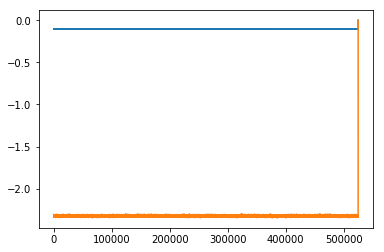

In [15]:
import matplotlib.pyplot as pp
%matplotlib inline

pp.plot(en2001a_out)
# pp.axhline(y=0.21, color='r', linestyle='-')
pp.show()

In [16]:
print(en2001a_out[:,1])
print(en2001a_out[:,1].max())
print(en2001a_out[:,1].mean())

[-2.30870461 -2.32030582 -2.32857943 ...,  0.          0.          0.        ]
0.0
-2.32589


In [18]:
# how many 0 at  the end of en2001a_out[:,1]
how_many_zero = 0
for num in en2001a_out[:,1]:
    if (num==0):
        how_many_zero += 1
print (how_many_zero)

65


In [22]:
output = .5 * (en2001a_out[:, 0] + en2001a_out[:, 1])

In [23]:
print (output)
print (output.max())
print (output.mean())

[-1.22355378 -1.22471225 -1.22498453 ...,  0.          0.          0.        ]
0.0
-1.22235


In [46]:
en2001a_out_exp = np.exp(en2001a_out)

In [47]:
print ()
print (en2001a_out_exp.max())
print (en2001a_out_exp.mean())

[[ 0.90429747  0.09570252]
 [ 0.90454507  0.09545491]
 [ 0.90460318  0.0953968 ]
 ..., 
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]]
1.0
0.500062


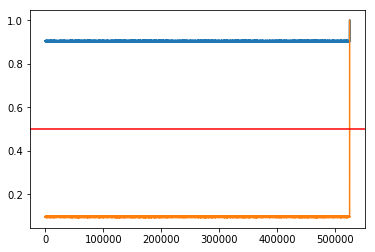

In [49]:
import matplotlib.pyplot as pp

pp.plot(en2001a_out_exp)
pp.axhline(y=0.5, color='r', linestyle='-')
pp.show()

In [20]:
print(en2001a_out_exp[:,1])
print(en2001a_out_exp[:,1].max())
print(en2001a_out_exp[:,1].mean())

[ 0.09570252  0.09545491  0.0953968  ...,  1.          1.          1.        ]
1.0
0.0960464


In [24]:
# Evaluation Metric
from pyannote.metrics.diarization import DiarizationPurityCoverageFMeasure
metric = DiarizationPurityCoverageFMeasure()

In [25]:
# Loop on Test Files
from pyannote.database import get_annotated
for test_file in protocol.test():
    # print (test_file)
    # load reference annotation
    reference = test_file['annotation']
    uem = get_annotated(test_file)

    # load precomputed change scores as pyannote.core.SlidingWindowFeature
    scd_scores = precomputed(test_file)

    # binarize scores to obtain speech regions as pyannote.core.Timeline
    hypothesis = peak.apply(scd_scores, dimension=1)

    # evaluate speech activity detection
    metric(reference, hypothesis.to_annotation(), uem=uem)
    purity, coverage, fmeasure = metric.compute_metrics()
    print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

purity, coverage, fmeasure = metric.compute_metrics()
print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

Purity = 39.2% / Coverage = 100.0%
Purity = 35.7% / Coverage = 100.0%
Purity = 36.6% / Coverage = 100.0%
Purity = 35.6% / Coverage = 100.0%
Purity = 35.5% / Coverage = 100.0%
Purity = 34.7% / Coverage = 100.0%
Purity = 36.5% / Coverage = 100.0%
Purity = 37.1% / Coverage = 100.0%
Purity = 36.9% / Coverage = 100.0%
Purity = 37.8% / Coverage = 100.0%
Purity = 38.5% / Coverage = 100.0%
Purity = 37.7% / Coverage = 100.0%
Purity = 37.5% / Coverage = 100.0%
Purity = 37.7% / Coverage = 100.0%
Purity = 39.2% / Coverage = 100.0%
Purity = 39.3% / Coverage = 100.0%
Purity = 39.2% / Coverage = 100.0%
Purity = 39.9% / Coverage = 100.0%
Purity = 40.4% / Coverage = 100.0%
Purity = 39.7% / Coverage = 100.0%
Purity = 38.9% / Coverage = 100.0%
Purity = 38.6% / Coverage = 100.0%
Purity = 38.6% / Coverage = 100.0%


In [28]:
print(reference)

[ 00:01:39.500 -->  00:01:54.062] 0 MTD025PM
[ 00:01:42.940 -->  00:01:44.295] 1 MTD026UID
[ 00:01:43.189 -->  00:01:45.239] 2 MTD028ME
[ 00:01:54.300 -->  00:01:54.796] 3 MTD027ID
[ 00:01:54.668 -->  00:01:57.685] 4 MTD026UID
[ 00:01:55.212 -->  00:01:57.659] 5 MTD025PM
[ 00:01:55.840 -->  00:01:56.170] 6 MTD027ID
[ 00:01:56.300 -->  00:01:57.784] 7 MTD028ME
[ 00:01:58.930 -->  00:02:16.508] 8 MTD025PM
[ 00:02:01.200 -->  00:02:01.959] 9 MTD026UID
[ 00:02:01.810 -->  00:02:03.079] 10 MTD028ME
[ 00:02:01.850 -->  00:02:03.420] 11 MTD027ID
[ 00:02:03.575 -->  00:02:04.310] 12 MTD026UID
[ 00:02:09.592 -->  00:02:10.488] 13 MTD027ID
[ 00:02:17.220 -->  00:02:17.480] 14 MTD028ME
[ 00:02:17.820 -->  00:03:04.601] 15 MTD025PM
[ 00:02:23.440 -->  00:02:23.989] 16 MTD028ME
[ 00:02:27.240 -->  00:02:27.789] 17 MTD028ME
[ 00:02:28.332 -->  00:02:30.049] 18 MTD027ID
[ 00:02:29.333 -->  00:02:31.338] 19 MTD028ME
[ 00:02:30.340 -->  00:02:32.580] 20 MTD026UID
[ 00:02:32.892 -->  00:02:35.483] 21 MT

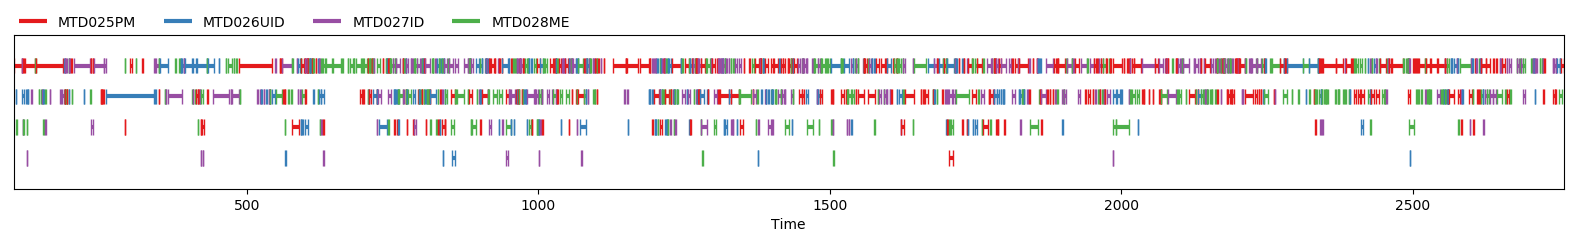

In [26]:
reference

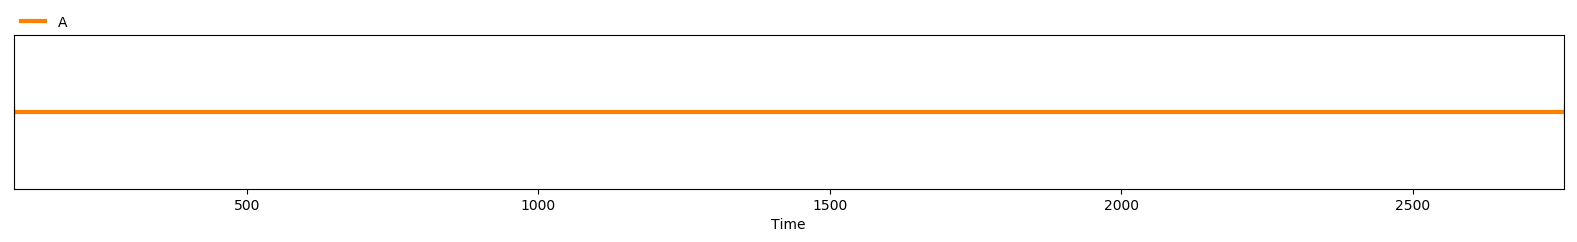

In [27]:
hypothesis.to_annotation()

In [ ]:
# Loop on Train Files
from pyannote.database import get_annotated
for train_file in protocol.train():
    # print (test_file)
    # load reference annotation
    reference = train_file['annotation']
    uem = get_annotated(train_file)

    # load precomputed change scores as pyannote.core.SlidingWindowFeature
    scd_scores = precomputed(train_file)

    # binarize scores to obtain speech regions as pyannote.core.Timeline
    hypothesis = peak.apply(scd_scores, dimension=1)

    # evaluate speech activity detection
    metric(reference, hypothesis.to_annotation(), uem=uem)

    purity, coverage, fmeasure = metric.compute_metrics()
    print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

In [ ]:
# Peak Detection
from pyannote.audio.signal import Peak
peak = Peak(alpha=0.1, min_duration=1.0, log_scale=True)

# Loop on Test Files
from pyannote.database import get_annotated
for test_file in protocol.train():
    # print (test_file)
    # load reference annotation
    reference = test_file['annotation']
    uem = get_annotated(test_file)

    # load precomputed change scores as pyannote.core.SlidingWindowFeature
    scd_scores = precomputed(test_file)

    # binarize scores to obtain speech regions as pyannote.core.Timeline
    hypothesis = peak.apply(scd_scores, dimension=1)

    # evaluate speech activity detection
    metric(reference, hypothesis.to_annotation(), uem=uem)

    purity, coverage, fmeasure = metric.compute_metrics()
    print(f'Purity = {100*purity:.1f}% / Coverage = {100*coverage:.1f}%')

In [ ]:
hypothesis.to_annotation()